In [ ]:

!pip install mlxtend


In [ ]:

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:

# Example 1 

data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

df = pd.DataFrame(data)

#print(df)

frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)

print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

print(rules)


In [ ]:

# Example 2

retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

retail = pd.DataFrame(retail_shopping_basket)

pd.options.display.max_colwidth=100

#print(retail)

retail = retail.drop('Basket' ,1).join(retail.Basket.str.join(',').str.get_dummies(','))

#print(retail)

frequent_itemsets_2 = apriori(retail.drop('ID',1), use_colnames=True)

#print(frequent_itemsets_2)

rules_2 = association_rules(frequent_itemsets_2, metric='lift')

print(rules_2)

rules_2 = association_rules(frequent_itemsets_2) 

print(rules_2)


In [ ]:

# Example 3

movies = pd.read_csv('./movies.csv')

movies_ohe = movies.drop('genres',1).join(movies.genres.str.get_dummies())

pd.options.display.max_columns=100

stat1 = movies_ohe.drop(['title', 'movieId'],1).apply(pd.value_counts)
stat1 = stat1.transpose().drop(0,1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})

stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat2 = stat2[stat2['genre_count']==1].drop('movieId',1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

print(stat)


Text(0.5, 1.0, 'distribution of number of genres')

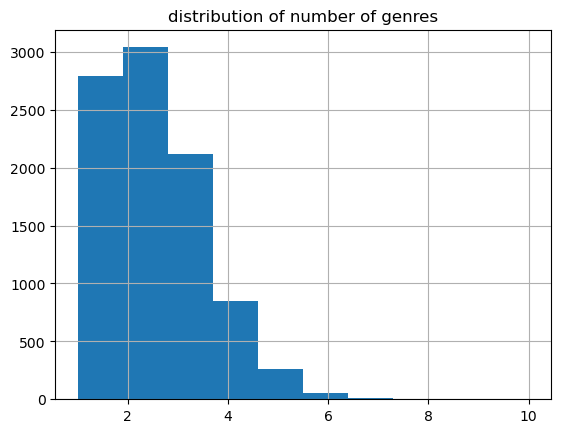

In [17]:

import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')



In [ ]:

# Get frequent items && rules 

frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)
                                   
print(frequent_itemsets_movies)

rules_movies = association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

print(rules_movies)
